<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Импортируем-данные-в-датафрейм" data-toc-modified-id="Импортируем-данные-в-датафрейм-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Импортируем данные в датафрейм</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

## Загрузка данных

### Импортируем библиотеки 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Импортируем данные в датафрейм

In [6]:
df = pd.read_csv('/Users/daniilpetrovskiy/Desktop/yandex_practicum_project/10. Защита персональных данных клиентов/insurance.csv')

In [7]:
# функция 
def information_about_df(data):
    print(data.info())
    return data.head(5)

In [8]:
information_about_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [9]:
# проверим, есть ли пропуски в df
df.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Пропусков нет

**Построим гистограммы, чтобы увидеть распределения по признакам.**

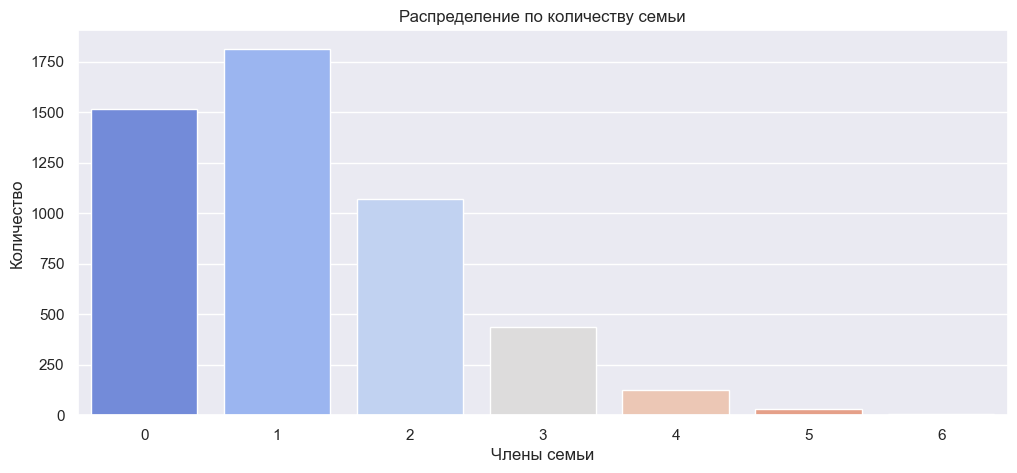

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='Члены семьи', data = df, palette='coolwarm')
ax.set_title('Распределение по количеству семьи')
plt.ylabel('Количество');

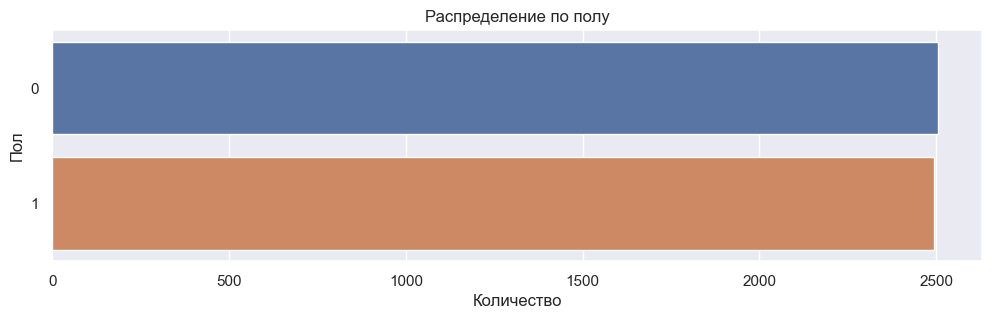

In [11]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y='Пол', data = df)
ax.set_title('Распределение по полу')
plt.xlabel('Количество');

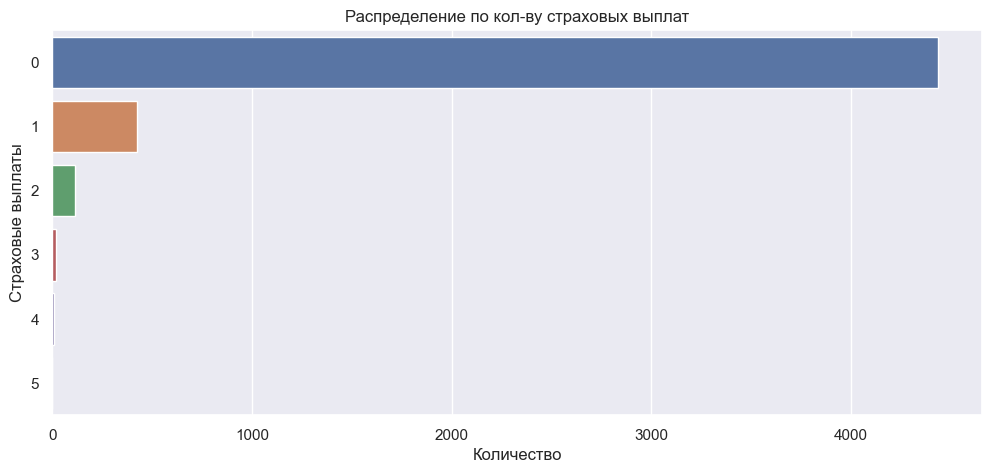

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(y='Страховые выплаты', data = df)
ax.set_title('Распределение по кол-ву страховых выплат')
plt.xlabel('Количество');

/Users/artemvishanov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


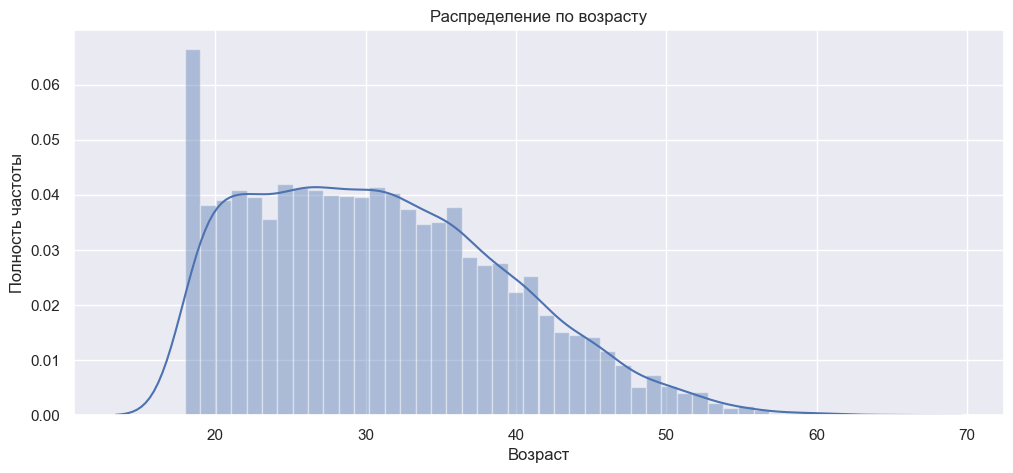

In [13]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Возраст'], bins = len(df['Возраст'].unique()))
ax.set_title('Распределение по возрасту')
plt.ylabel('Полность частоты');

/Users/artemvishanov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


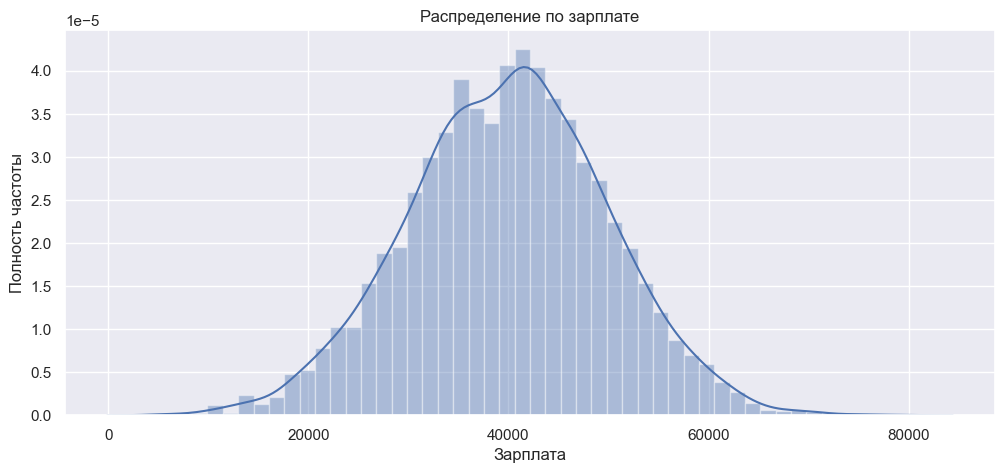

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Зарплата'])
ax.set_title('Распределение по зарплате')
plt.ylabel('Полность частоты');

**Вывод:**

1. Данные предоставлены в предобработанном виде
2. Признаки распределены без аномалий

>Данные готовы для дальнейших исследований

## Умножение матриц

**Вопрос:** признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 
>Качество линейной регрессии не изменится, изменится лишь вектор весов линейной регрессии для новых признаков.

**Обоснование:**

Представим нашу новую матрицу признаков как результат умножения исходной матрицы признаков на некую обратимую матрицу:

$$
X_1 = XP
$$

Тогда наша формула обучения примет вид: $w_1 = (X_1^{T}X_1)^{-1}X_1^{T}y$

Подставив в нее значения $X_1$, получим:

$w_1 = ((XP)^{T}XP)^{-1}(XP)^{T}y$

Воспользуемся следующими свойствами матриц, а именно:

$$A(BC) = (AB)C$$

$$(AB)^{-1} = A^{-1}B^{-1}$$

$$(AB)^{T} = A^{T}B^{T}$$

$$(A^{T})^{-1}= (A^{-1})^{T}$$

$$(ABC)^{-1} = C^{-1}B^{-1}A^{-1}$$

$$AA^{-1} = E$$

$$AE = EA = A$$

Тогда нашу формулу для расчета вектора весов можно переписать:

$$w_1 = ((XP)^{T}XP)^{-1}(XP)^{T}y$$

$$w_1 = (P^{T}(x^{T}X)P)^{-1}(XP)^{T}y$$

$$w_1 = (P^{T}(x^{T}X)P)^{-1}P^{T}X^{T}y$$

$$w_1 = P^{-1}(X^{T}X)^{-1}(P^{T})^{-1}P^{T}X^{T}y$$

$$w_1 = P^{-1}(X^{T}X)^{-1}EX^{T}y$$

$$w_1 = P^{-1}w$$

Тоже самое, для формулы предсказаний: $a_1 = X_1w_1$, подставив получившиеся значения $X_1 = XP$ и $w_1 = P^{-1}w$, получим:

$$a_1 = XPP^{-1}w$$

$$то$$

$$a_1 = Xw$$

**Тем самым получаем, что наши предсказания никоем образом не изменятся.**

## Алгоритм преобразования

**Алгоритм:**

Нам необходимо будет:

сгенерировать обратимую матрицу, соответственно квадратную, размерностью соответствующую количеству столбцов признаков, а это 4х4.

умножить матрицу исходных признаков на сгенерированную матрицу.

посчитать качество модели на полученной матрице и сравнить с качеством модели на матрице исходных данных.

**Обоснование:**

В предыдущем пункте мы выяснили, что предсказания на измененной и изначальной матрице не должны отличаться, поэтому результаты метрики R2 должны оказаться равны. Тем самым мы докажем, что правильно защитили наши данные.

## Проверка алгоритма

Разделим данные на признаки и целевой признак **features** и **target**:

In [15]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Создадим класс **LinReg** и напишем 2 метода **fit** и **predict**.

Первый находит веса w, второй делает предскказания:

In [16]:
class LinReg:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv((X.T @ X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print(w)
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0        

Создадим модель, сохраним ее в переменной **model** и обучим. Найдем ее предсказания на обучающей выборке и сохраним их впеременной **predictions**.

Напечатаем на экране веса и значения метрик R2. Она вычисляется по MSE.

In [17]:
model = LinReg()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

[-9.38235504e-01  7.92580543e-03  3.57083050e-02 -1.70080492e-07
 -1.35676623e-02]


0.4249455028666801

Создадим случайную квадратную матрицу, размером по кол-ву столбцов **features**

In [18]:
random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
random_matrix

array([[-1.8861681 , -1.41808645, -0.39936862,  1.9470792 ],
       [-0.8747684 ,  0.12459563, -0.45108426,  0.48593555],
       [ 0.50244456, -0.24922257, -0.20546855,  0.29507511],
       [ 0.25139702, -0.82978477, -0.16889118, -1.67762561]])

Проверим на обратимость, вызвав **np.linalg.inv()**

In [19]:
np.linalg.inv(random_matrix)

array([[-0.14876455, -0.28353641,  0.97945089, -0.08251257],
       [-0.40336431,  0.61162882, -0.27919542, -0.34009596],
       [ 0.33198477, -1.68682103, -1.50628848, -0.36823109],
       [ 0.14379686, -0.17519481,  0.43651097, -0.40315669]])

In [20]:
random_matrix @ np.linalg.inv(random_matrix)

array([[ 1.00000000e+00,  0.00000000e+00,  1.11022302e-16,
         0.00000000e+00],
       [ 1.38777878e-17,  1.00000000e+00,  8.32667268e-17,
        -5.55111512e-17],
       [ 3.46944695e-17, -8.32667268e-17,  1.00000000e+00,
        -1.38777878e-17],
       [-2.77555756e-17,  1.11022302e-16,  0.00000000e+00,
         1.00000000e+00]])

Признаки датафрейма умножим на обратимую матрицу **random_matrix** 

In [21]:
encoded_features = features.dot(random_matrix)
encoded_features

,0,1,2,3
0,24883.749797,-12358.579006,-10210.302616,14655.918334
1,19052.905251,-9465.556110,-7828.723530,11233.529641
2,10525.967432,-5230.060732,-4327.920918,6210.669469
3,20934.070722,-10391.624301,-8577.848937,12311.481538
4,13087.423278,-6502.638530,-5375.758789,7717.013681
...,...,...,...,...
4995,17913.279996,-8895.416701,-7348.195248,10544.432419
4996,26298.604106,-13055.856290,-10782.057587,15476.780018
4997,17015.877939,-8447.812837,-6974.743190,10009.409734
4998,16409.560162,-8150.744431,-6729.651363,9656.560925


Обучим модель на новых признаках, найдем предсказания, веса и посчитаем R2:

In [22]:
model = LinReg()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
r2_score(target, predictions)

[-9.38235504e-01 -1.01843471e-02  2.32575973e-02 -5.26059823e-02
  3.53615707e-04]


0.424945502866677

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

Создадим  модель **sklearn_model** и обучим на 2 обучающих матрицах:
* исходной **features**
* кодированной **encoded_features**

In [23]:
sklearn_model = LinearRegression().fit(features, target)
pred = sklearn_model.predict(features)
r2_score(target, pred)

0.4249455028666801

In [24]:
sklearn_model = LinearRegression().fit(features, target)
pred = sklearn_model.predict(features)
r2_score(target, pred)

0.4249455028666801

Качество модели по двум наборам признаков совпадает.

**Вывод:**

>Качество метрики R2 для 2 матриц признаков: до преобразования и после равны, а также равны R2 по написанному класс линейной регресии **LinReg**, что говорит о ее правильном написании в сравнении с моделью из sklearn.

## Общий вывод:

**Из проведенных исследований были сделаны следующие выводы:**

- Умножение признаков на обратимую матрицу не влияет на качество линейной регрессии, поскольку веса были пересчитаны для новых значений признаков, сохраняя при этом связь между исходной матрицей и преобразованной матрицей через веса.
- Предложенный алгоритм эффективно решает задачу шифрования признаков.
- Зашифрованные данные подходят для использования в линейной регрессии и дают точные предсказания.
- Алгоритм допускает дешифровку данных в любой момент.
- Использование случайности в алгоритме гарантирует, что каждый раз при зашифровании будут получаться новые данные, которые сложно восстановить без знания кода программы.
- Реализованный алгоритм полностью соответствует целям защиты персональных данных клиентов страховой компании.